In [52]:
import pandas as pd 
import numpy as np
import pandasql as ps
import os
from preprocess_days_stats import preprocess_cumulative_stats, preprocess_match_days
import warnings
# Ignora tutti i warning temporaneamente
warnings.filterwarnings("ignore")

df_giornate = preprocess_match_days(r"c:\Users\Hp\Documents\Serie_A\csv_serie_a")
df_Serie_A_5days, stats_squadre = preprocess_cumulative_stats(dataframe=df_giornate)

Reading file: I1 (0).csv
Reading file: I1 (1).csv
Reading file: I1 (10).csv
Reading file: I1 (11).csv
Reading file: I1 (12).csv
Reading file: I1 (13).csv
Reading file: I1 (14).csv
Reading file: I1 (15).csv
Reading file: I1 (16).csv
Reading file: I1 (17).csv
Reading file: I1 (18).csv
Reading file: I1 (2).csv
Reading file: I1 (3).csv
Reading file: I1 (4).csv
Reading file: I1 (5).csv
Reading file: I1 (6).csv
Reading file: I1 (7).csv
Reading file: I1 (8).csv
Reading file: I1 (9).csv
preprocessing finished!

le squadre sono uguali:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
preprocess finished


In [53]:
pd.set_option('display.max_columns', None)
stats_squadre['Milan'].head()

,squadra,index,div,giornata,stagione,date,ft_goals,ft_goals_conceded,ht_goals,shots,shots_target,fouls_done,corners_obtained,yellows,reds,points,result,result_1,result_2,result_3,result_4,result_5,total_points,last_5_days_ft_goals,last_5_days_ht_goals,last_5_days_shots,last_5_days_shots_target,last_5_days_ft_goals_conceded,last_5_days_fouls_done,last_5_days_corners_obtained,last_5_days_yellows,last_5_days_reds
0,Milan,2,I1,1,2005/2006,2005-08-28,1.0,1.0,0.0,16.0,9.0,16.0,5.0,1.0,0.0,1,D,###,###,###,###,###,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Milan,10,I1,2,2005/2006,2005-09-10,3.0,1.0,2.0,21.0,11.0,7.0,3.0,1.0,0.0,3,W,D,###,###,###,###,1.0,1.0,0.0,16.0,9.0,1.0,16.0,5.0,1.0,0.0
2,Milan,28,I1,3,2005/2006,2005-09-18,1.0,2.0,1.0,12.0,5.0,16.0,7.0,1.0,0.0,0,L,W,D,###,###,###,4.0,4.0,2.0,37.0,20.0,2.0,23.0,8.0,2.0,0.0
3,Milan,35,I1,4,2005/2006,2005-09-21,2.0,0.0,2.0,12.0,7.0,17.0,5.0,0.0,0.0,3,W,L,W,D,###,###,4.0,5.0,3.0,49.0,25.0,4.0,39.0,15.0,3.0,0.0
4,Milan,49,I1,5,2005/2006,2005-09-25,2.0,0.0,1.0,12.0,6.0,13.0,2.0,0.0,0.0,3,W,W,L,W,D,###,7.0,7.0,5.0,61.0,32.0,4.0,56.0,20.0,3.0,0.0


In [54]:
df_Serie_A_5days.head()

,div,giornata,stagione,date,hometeam,awayteam,home_total_points,home_result,home_result_1,home_result_2,home_result_3,home_result_4,home_result_5,away_total_points,away_result,away_result_1,away_result_2,away_result_3,away_result_4,away_result_5,ft_home_goals,home_last_5_days_ft_goals,ft_away_goals,away_last5_days_ft_goals,ft_result,ht_home_goals,home_last_5_days_ht_goals,ht_away_goals,away_last5_days_ht_goals,home_last_5_days_ft_goals_conceded,away_last5_days_ft_goals_conceded,ht_results,home_shots,home_last_5_days_shots,away_shots,away_last5_days_shots,home_shots_targ,home_last_5_days_shots_target,away_shots_targ,away_last5_days_shots_target,home_fouls,home_last_5_days_fouls_done,away_fouls,away_last5_days_fouls_done,home_corners,home_last_5_days_corners_obtained,away_corners,away_last5_days_corners_obtained,home_yellow,home_last_5_days_yellows,away_yellow,away_last5_days_yellows,home_red,home_last_5_days_reds,away_red,away_last5_days_reds,home_win_odds,draw_odds,away_win_odds
0,I1,1,2005/2006,2005-08-27,Fiorentina,Sampdoria,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,2.0,0.0,1.0,0.0,H,2.0,0.0,0.0,0.0,0.0,0.0,H,15.0,0.0,9.0,0.0,9.0,0.0,4.0,0.0,18.0,0.0,23.0,0.0,9.0,0.0,3.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.20,2.87,3.25
1,I1,1,2005/2006,2005-08-27,Livorno,Lecce,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,2.0,0.0,1.0,0.0,H,1.0,0.0,1.0,0.0,0.0,0.0,D,17.0,0.0,6.0,0.0,7.0,0.0,5.0,0.0,27.0,0.0,21.0,0.0,9.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.90,2.90,4.00
2,I1,1,2005/2006,2005-08-28,Ascoli,Milan,0.0,D,###,###,###,###,###,0.0,D,###,###,###,###,###,1.0,0.0,1.0,0.0,D,0.0,0.0,0.0,0.0,0.0,0.0,D,8.0,0.0,16.0,0.0,3.0,0.0,9.0,0.0,22.0,0.0,16.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.50,3.75,1.40
3,I1,1,2005/2006,2005-08-28,Inter,Treviso,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,3.0,0.0,0.0,0.0,H,1.0,0.0,0.0,0.0,0.0,0.0,H,16.0,0.0,7.0,0.0,9.0,0.0,3.0,0.0,13.0,0.0,20.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.16,5.50,13.00
4,I1,1,2005/2006,2005-08-28,Juventus,Chievo,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,1.0,0.0,0.0,0.0,H,1.0,0.0,0.0,0.0,0.0,0.0,H,16.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,16.0,0.0,12.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.25,5.00,13.00


# Vediamo quanto giocare in casa influisce sulla vittoria

NameError: name 'pd' is not defined

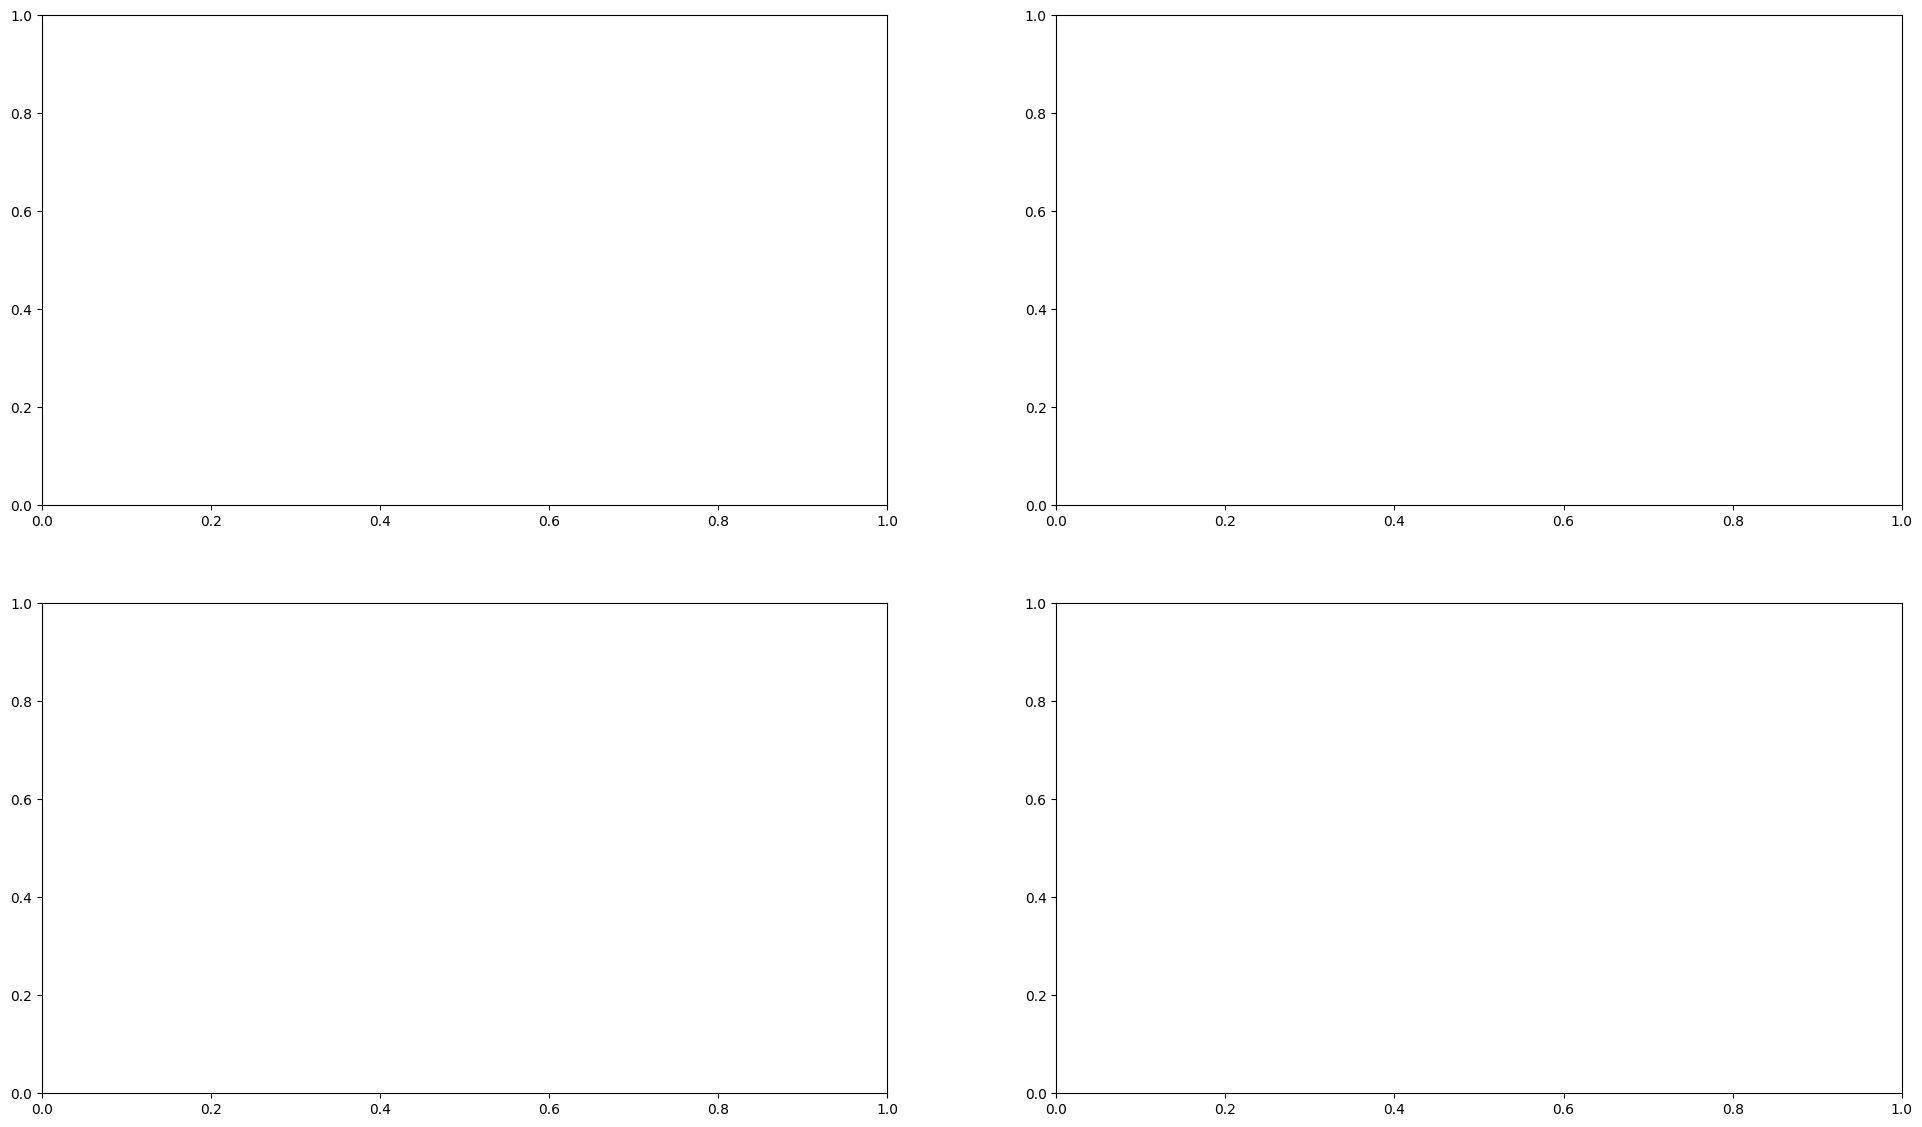

In [56]:
import random
import matplotlib.pyplot as plt
from Data_visualization import visualize_home_win_season
import pandas as pd

visualize_home_win_season(dataframe=df_Serie_A_5days)


Vediamo ogni anno in media quante vittorie in casa sono registrate

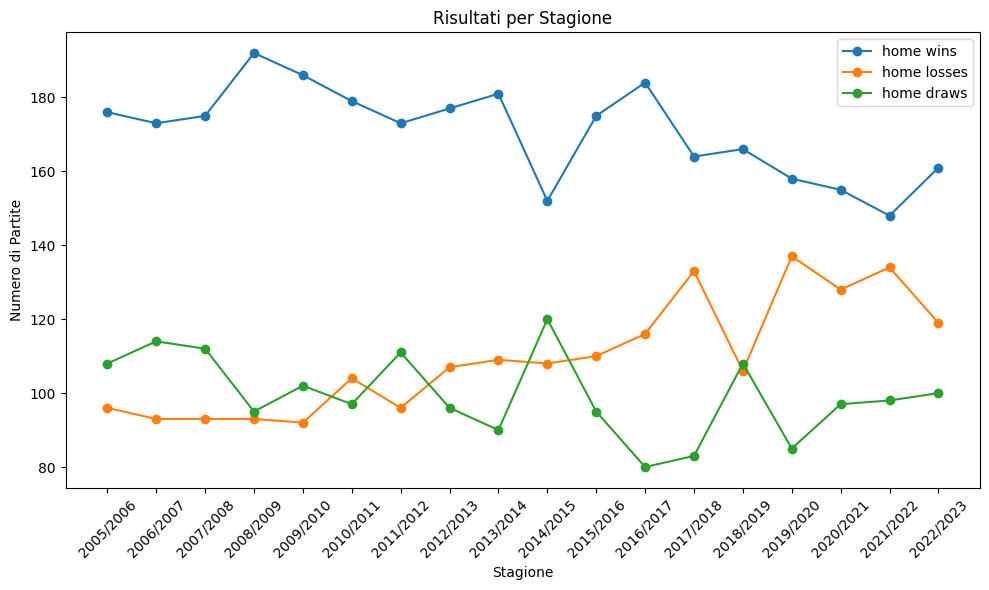

In [ ]:
risultati_stag = df_Serie_A_5days[['stagione','home_result']].groupby('stagione')['home_result'].value_counts().unstack()

# # Creazione del plot
plt.figure(figsize=(10, 6))
plt.plot(risultati_stag.index[:-1], risultati_stag['W'][:-1], label='home wins', marker='o')
plt.plot(risultati_stag.index[:-1], risultati_stag['L'][:-1], label='home losses', marker='o')
plt.plot(risultati_stag.index[:-1], risultati_stag['D'][:-1], label='home draws', marker='o')

# Aggiunta di titoli e etichette
plt.title('Risultati per Stagione')
plt.xlabel('Stagione')
plt.ylabel('Numero di Partite')
plt.legend()

# Rotazione degli assi X per migliorare la leggibilità
plt.xticks(rotation=45)

# Mostrare il plot
plt.tight_layout()
plt.show()

E' chiaro che il giocare in casa è vantaggioso

# Vediamo la correlazione fra tiri in porta e gol fatti

<Axes: title={'center': 'stagione=2013/2014'}>

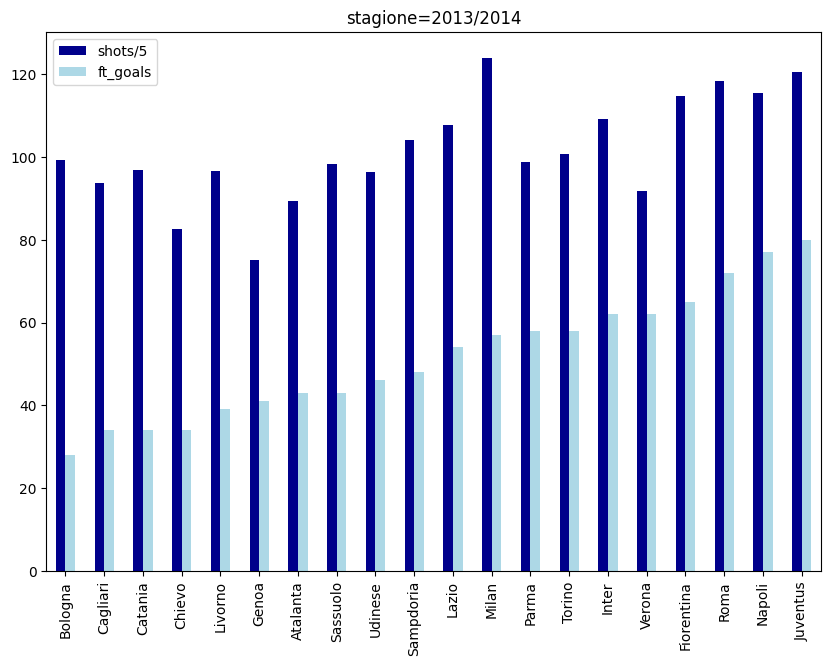

In [ ]:
stagione = random.choice(df_giornate['stagione'].unique())

squadre_tiri_gol = {}
tiri_gol = {}
for squadra in stats_squadre.keys():
    df_season_temp = stats_squadre[squadra][stats_squadre[squadra]['stagione']==stagione]
    if len(df_season_temp) > 0:
        tiri_gol['shots/5'] = df_season_temp['shots'].sum()/5
        tiri_gol['ft_goals'] = df_season_temp['ft_goals'].sum()
        squadre_tiri_gol[squadra] = tiri_gol.copy()

pd.DataFrame(squadre_tiri_gol).transpose().sort_values(['ft_goals']).plot(kind="bar", figsize=(10, 7), color=['darkblue', 'lightblue'],title= f'stagione={stagione}')


SI nota che in linea di massima le squadre che tirano di più segnano di più, ma non è così stringente come rapporto
Proviamo a vedere se con i tiri in porta è doverso

<Axes: title={'center': 'stagione=2007/2008'}>

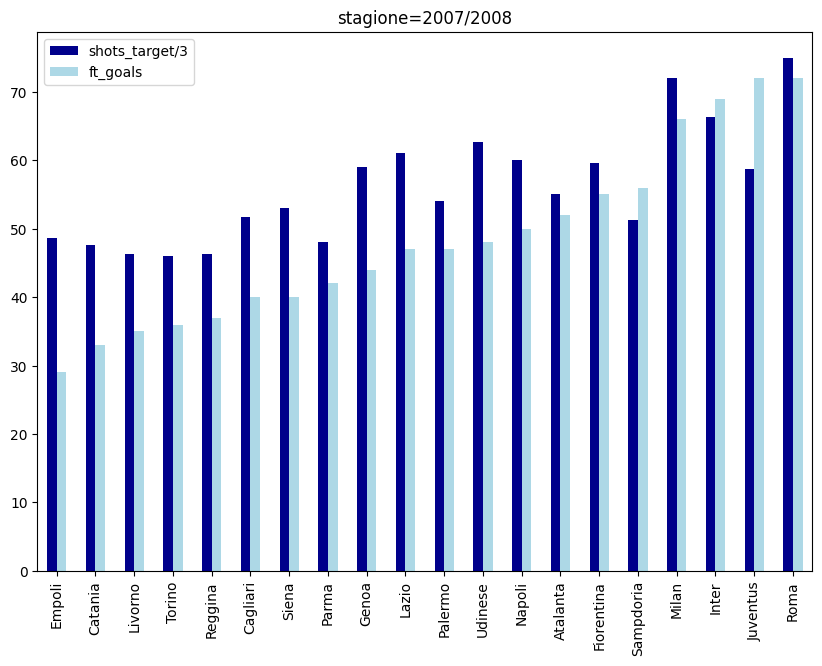

In [ ]:
stagione = random.choice(df_giornate['stagione'].unique())

squadre_tiri_gol = {}
tiri_gol = {}
for squadra in stats_squadre.keys():
    df_season_temp = stats_squadre[squadra][stats_squadre[squadra]['stagione']==stagione]
    if len(df_season_temp) > 0:
        tiri_gol['shots_target/3'] = df_season_temp['shots_target'].sum()/3
        tiri_gol['ft_goals'] = df_season_temp['ft_goals'].sum()
        squadre_tiri_gol[squadra] = tiri_gol.copy()

pd.DataFrame(squadre_tiri_gol).transpose().sort_values(['ft_goals']).plot(kind="bar", figsize=(10, 7), color=['darkblue', 'lightblue'], title= f'stagione={stagione}')

I risultati sono simili. Vediamo adesso la media di tiri nelle ultime 5 partite e la correlazione con la vittoria nella stagione 21/22

In [ ]:
# calcoliamo i percentili di tiri per ogni partita
stagione_21_22 = df_Serie_A_5days[df_Serie_A_5days['stagione']=='2021/2022']
media_tiri_ultime_5 = list(stagione_21_22['home_last_5_days_shots_target'])+ list(stagione_21_22['home_last_5_days_shots_target'])
np.percentile(media_tiri_ultime_5, [25, 50, 75])

array([15., 21., 25.])